# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Метаданные:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### Creating datasets for ML part
* ### StandardScaler
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)


## Part 1: Import, Load Data.

* ### Import libraries

In [2]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [3]:
# read data from '.csv' file
data = pd.read_csv("winequality.csv")

## Part 2: Exploratory Data Analysis.

* ### Info

In [4]:
# print the full summary of the dataset  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* ### Head

In [5]:
# preview of the first 5 lines of the loaded data 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* ### Encoding 'quality' attribute

In [7]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
data["quality"] = data["quality"].apply(lambda x: 0 if x < 7 else 1)

In [8]:
# preview of the first 5 lines of the loaded data 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [9]:
data["quality"].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

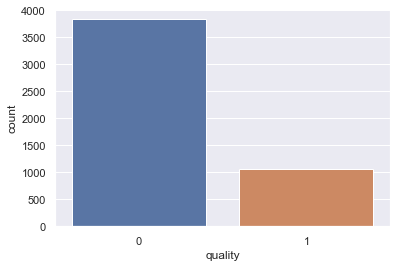

In [10]:
# visualisation plot
sns.countplot(x="quality", data=data);

* ### Resampling of an imbalanced dataset

In [11]:
# class count
count_class_0, count_class_1 = data['quality'].value_counts()

# divide by class
class_0 = data[data["quality"] == 0]
class_1 = data[data["quality"] == 1]

* ### Random under-sampling of an imbalanced dataset

In [12]:
#class_0_under = class_0.sample(count_class_1)
#data_under = pd.concat([class_0_under, class_1], axis=0)
#sns.countplot(x="quality", data=data_under);

* ### Random over-sampling of an imbalanced dataset

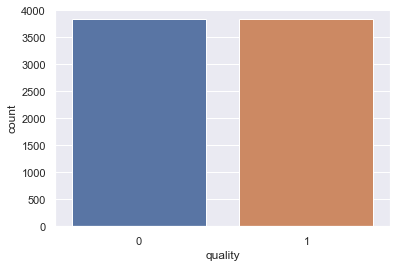

In [13]:
class_1_over = class_1.sample(count_class_0, replace=True)
data_over = pd.concat([class_0, class_1_over], axis=0)
sns.countplot(x="quality", data=data_over);

## Part 3: Data Wrangling and Transformation.

* ### Creating datasets for ML part

In [14]:
# set 'X' for features' and y' for the target ('quality').
#X = data.drop('quality', axis=1)
#y = data['quality']

# for under-sampling dataset 
#X = data_under.drop('quality', axis=1)
#y = data_under['quality']

# for over-sampling dataset 
X = data_over.drop('quality', axis=1)
y = data_over['quality']

In [15]:
# preview of the first 5 lines of the loaded data 
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


* ### 'Train\Test' split

In [16]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((6140, 11), (6140,))

In [18]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((1536, 11), (1536,))

* ### StandardScaler

In [19]:
# StandardScaler 
sc = StandardScaler()
data_sc_train = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
data_sc_test  = pd.DataFrame(sc.transform(X_test), columns=X.columns)


In [20]:
data_sc_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.493849,-0.139751,-0.280473,-0.783698,-0.924337,-0.133132,0.009939,-0.466522,0.085827,-0.183213,-0.195680
1,-0.493849,-1.153361,-0.095440,0.569963,-0.255792,0.180373,-0.390889,0.352689,-0.044565,-0.688988,-0.120126
2,0.860733,-0.443834,-0.280473,-0.990363,-0.667204,-0.509339,-1.342856,-0.492842,-0.957306,1.587000,-0.271234
3,0.121870,0.062971,-0.558023,-0.804364,-0.358645,0.431177,-0.315734,-0.269121,1.454939,-0.014621,-0.044572
4,-0.493849,-0.342473,-0.928090,-0.825031,0.155620,-0.321236,-0.015113,-0.861322,-0.500935,0.406858,0.408752


In [21]:
data_sc_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.863280,-0.342473,-0.650540,-0.887030,-0.512925,1.622497,0.009939,-1.025822,-0.044565,2.682845,0.786522
1,-1.479000,1.482024,0.089593,-0.742364,-1.078616,-0.070431,-0.916976,-1.404172,0.151023,-0.941876,1.466508
2,-0.370705,-1.153361,0.089593,-0.949030,-0.718631,-0.383937,-0.015113,-0.769202,0.868177,1.249816,0.484306
3,0.614446,0.671137,-1.113123,-0.577032,0.361326,-1.324452,0.060043,0.059879,0.346610,-0.436101,-0.497896
4,-0.370705,0.164332,-0.187956,-0.887030,-0.410072,-0.697442,-1.367908,-0.950152,0.477002,1.671295,0.408752


## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [22]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(data_sc_train, y_train)
LR_pred = LR.predict(data_sc_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(data_sc_train, y_train)
KNN_pred = KNN.predict(data_sc_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state=0)
DT.fit(data_sc_train, y_train)
DT_pred = DT.predict(data_sc_test)

* ### Classification report

In [23]:
print(f"LogisticRegression: \n {classification_report(y_test, LR_pred, digits=6)} ")

LogisticRegression: 
               precision    recall  f1-score   support

           0   0.732240  0.699739  0.715621       766
           1   0.713930  0.745455  0.729352       770

    accuracy                       0.722656      1536
   macro avg   0.723085  0.722597  0.722486      1536
weighted avg   0.723062  0.722656  0.722504      1536
 


In [24]:
print(f"KNeighborsClassifier: \n {classification_report(y_test, KNN_pred, digits=6)} ")

KNeighborsClassifier: 
               precision    recall  f1-score   support

           0   0.922705  0.748042  0.826244       766
           1   0.789071  0.937662  0.856973       770

    accuracy                       0.843099      1536
   macro avg   0.855888  0.842852  0.841608      1536
weighted avg   0.855714  0.843099  0.841649      1536
 


In [25]:
print(f"DecisionTreeClassifier: \n {classification_report(y_test, DT_pred, digits=6)} ")

DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0   0.958092  0.865535  0.909465       766
           1   0.877962  0.962338  0.918216       770

    accuracy                       0.914062      1536
   macro avg   0.918027  0.913936  0.913840      1536
weighted avg   0.917923  0.914062  0.913852      1536
 


* ### Confusion matrix

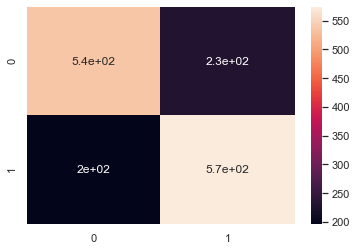

In [26]:
sns.heatmap(confusion_matrix(y_test, LR_pred), annot=True);

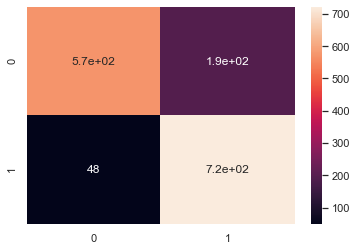

In [27]:
sns.heatmap(confusion_matrix(y_test, KNN_pred), annot=True);

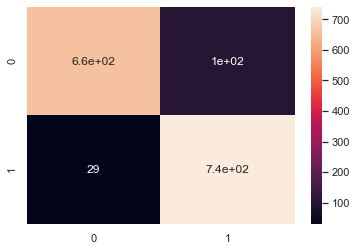

In [28]:
sns.heatmap(confusion_matrix(y_test, DT_pred), annot=True);

* ### ROC-AUC score

In [29]:
roc_auc_score(y_test, DT_pred)

0.913936455189719

* ### Build, train and evaluate models with hyperparameters

In [30]:
# Logistic Regression
LR = LogisticRegression()
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'random_state':[0]}
LR1 = GridSearchCV(LR, param_grid = LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)             
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1 = GridSearchCV(DT, param_grid = DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)

In [31]:
# print the best hyper parameters set
print(f"LogisticRegression: {LR1.best_params_}")
print(f"KNeighborsClassifier: {KNN1.best_params_}")
print(f"DecisionTreeClassifier: {DT1.best_params_}")

LogisticRegression: {'C': 1, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg'}
KNeighborsClassifier: {'n_neighbors': 5}
DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 20, 'random_state': 0}


* ### Classification report

In [32]:
print(f"LogisticRegression: \n {classification_report(y_test, LR1_pred, digits=6)} ")
print(f"KNeighborsClassifier: \n {classification_report(y_test, KNN1_pred, digits=6)} ")
print(f"DecisionTreeClassifier: \n {classification_report(y_test, DT1_pred, digits=6)} ")

LogisticRegression: 
               precision    recall  f1-score   support

           0   0.732606  0.701044  0.716478       766
           1   0.714819  0.745455  0.729816       770

    accuracy                       0.723307      1536
   macro avg   0.723713  0.723249  0.723147      1536
weighted avg   0.723689  0.723307  0.723164      1536
 
KNeighborsClassifier: 
               precision    recall  f1-score   support

           0   0.858506  0.704961  0.774194       766
           1   0.750827  0.884416  0.812165       770

    accuracy                       0.794922      1536
   macro avg   0.804666  0.794688  0.793179      1536
weighted avg   0.804526  0.794922  0.793229      1536
 
DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0   0.957507  0.882507  0.918478       766
           1   0.891566  0.961039  0.925000       770

    accuracy                       0.921875      1536
   macro avg   0.924537  0.921773  0.921739      1536


* ### Confusion matrix

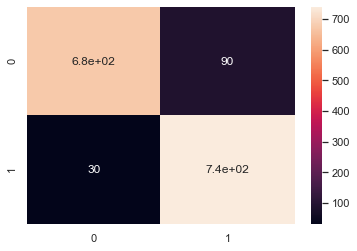

In [33]:
# confusion matrix of DT model
conf_mat_DT1 = confusion_matrix(y_test, DT1_pred)

# visualisation
sns.heatmap(conf_mat_DT1, annot=True);

* ### ROC-AUC score

In [34]:
roc_auc_score(y_test, DT1_pred)

0.9217727442270522

##  Conclusion.

In [110]:
# submission of .csv file with predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['quality'] = DT1_pred
sub.to_csv('WinePredictionsTest.csv', index=False)

**Question**: Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model).

**Answers**:

1. Binary classification was applied.

2. Classes were highly imbalanced. 

3. Three options were applied in order to calculate the best predictions:
    * Calculate predictions with imbalanced dataset
    * Calculate predictions with random under-sampling technique of an imbalanced dataset
    * Calculate predictions with random over-sampling technique of an imbalanced dataset (the best solution)
    
4. Three ML models were used: Logistic Regression, KNN, Decision Tree (without and with hyper parameters).

5. The best result was choosen: 
    * Random over-sampling dataset with 3838 enteties in class '0' and 3838 enteties in class '1', 7676 enteties in total.
    * Train/Test split: test_size=0.2, random_state=0
    * Decision Tree model with hyper parameters tuning, with an accuracy score equal 0.921875 and ROC-AUC score equal 0.921773.